# Machine Learning: Supervised Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clasificación:-Regresión-Logística" data-toc-modified-id="Clasificación:-Regresión-Logística-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clasificación: Regresión Logística</a></span><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Regresión-Logística-con-Scikit-Learn" data-toc-modified-id="Regresión-Logística-con-Scikit-Learn-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regresión Logística con Scikit-Learn</a></span></li><li><span><a href="#Evaluar-la-precisión-del-modelo" data-toc-modified-id="Evaluar-la-precisión-del-modelo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Evaluar la precisión del modelo</a></span></li></ul></li><li><span><a href="#Ejercicio" data-toc-modified-id="Ejercicio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicio</a></span></li></ul></div>

## Clasificación: Regresión Logística

In [3]:
from src import figures

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Introducción

En este notebook vamos a estudiar los conceptos básicos de Clasificación y como podemos aplicarla usando la API de scikit-learn. Nos focalizaremos en Regresión Logística, pero veréis que es muy fácil aplicar otros algoritmos con la api de scikit-learn.

Para empezar, vamos a crear un dataset sintético que podamos aplicar en nuestro primer problema de clasificación.
Será un problema de clasificación binaria en el que, para ir entendiendo los conceptos, sólo utilizaremos dos predictores.

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, n_samples=200)

print(X.shape, y.shape)

(200, 2) (200,)


In [6]:
pd.crosstab(y, columns="counts")

col_0,counts
row_0,
0,100
1,100


In [7]:
X[:10, ]

array([[ 2.8219307 ,  1.25395648],
       [ 1.65581849,  1.26771955],
       [ 3.12377692,  0.44427786],
       [ 1.4178305 ,  0.50039185],
       [ 2.50904929,  5.7731461 ],
       [ 0.30380963,  3.94423417],
       [ 1.12031365,  5.75806083],
       [ 0.08848433,  2.32299086],
       [ 1.92238694,  0.59987278],
       [-0.65392827,  4.76656958]])

Como hemos hecho que nuestros datos sean bidimiensionales, podemos mostrarlos en un plot 2D donde la primera característica corresponda al eje *x* y la segunda característica al eje *y*. 

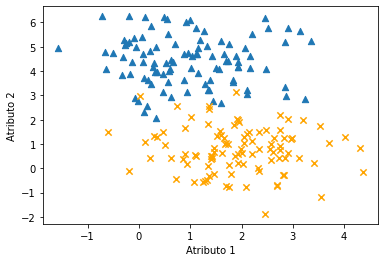

In [8]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="1", c="orange", marker="x")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.show()

Para evaluar los modelos que vamos a crear, vamos a separar el dataset en *train* y *test*. Recordad que estos dos conjuntos nos permiten:

1. **Training**: Ajustar el modelo a los datos de entrenamiento.
2. **Test**: Evaluar la capacidad de generalizar del modelo.


Para separar los dos conjuntos utilizamos la función `train_test_split` del módulo `model_selection`. Separaremos ambos conjuntos con un ratio de 75/25.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(150, 2) (150,)
(50, 2) (50,)


### Regresión Logística con Scikit-Learn

Todos los algoritmos implementados en scikit-learn están expuestos en su API mediante objetos de tipo *Estimator*, que garantiza que todos los modelos disponen de la misma API:

- `Estimator.`**`fit(X, y)`**: ajusta los parámetros del modelo a los datos
- `Estimator.`**`predict(X)`**: predicce los valores de salida para datos nuevos
- `Estimator.`**`score(X, y)`**: evalúa los resultados de la predicción

Nosotros utilizaremos el objeto LogisticRegression para nuestra tarea de clasificación:

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos: 

In [12]:
clf.fit(X_train, y_train)

LogisticRegression()

Los parámetros del modelo serían:

In [13]:
print(clf.intercept_, clf.coef_)

[5.14609874] [[ 0.89634307 -2.62074832]]


### Evaluar la precisión del modelo

Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos:

In [14]:
y_test_pred = clf.predict(X_test)
y_test_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [15]:
y_test_prob = clf.predict_proba(X_test)
y_test_prob[:10,]

array([[0.01425345, 0.98574655],
       [0.99831548, 0.00168452],
       [0.99739009, 0.00260991],
       [0.00324356, 0.99675644],
       [0.98280801, 0.01719199],
       [0.99346299, 0.00653701],
       [0.0014307 , 0.9985693 ],
       [0.9930465 , 0.0069535 ],
       [0.03568083, 0.96431917],
       [0.73551759, 0.26448241]])

Podemos comparar visualmente las predicciones con los valores de $y$ reales:

In [16]:
print(y_test_pred[:10])
print(y_test[:10])

[1 0 0 1 0 0 1 0 1 0]
[1 0 0 1 0 0 1 0 1 0]


Para evaluarlo cuantitativamente, podemos computar qué fracción de las predicciones es correcta. A esta métrica se le llama **accuracy**:

In [17]:
np.mean(y_test_pred == y_test)

0.92

Por supuesto, scikit-learn nos provee la función **`score`** para computar el **accuracy** directamente:

In [18]:
clf.score(X_test, y_test)

0.92

Suele ser muy útil comparar la capacidad de generalización del modelo en el conjunto de test con el accuracy en los datos de entrenamiento):


In [19]:
clf.score(X_train, y_train)

0.9866666666666667

Podemos obtener otras métricas como F-Score, etc.

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [21]:
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("Fscore:", f1_score(y_test, y_test_pred))

Precision: 0.9565217391304348
Recall: 0.88
Fscore: 0.9166666666666666


Podemos plotear una curva ROC para evaluar el rendimiento de nuestro modelo:

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
auc = roc_auc_score(y_test, y_test_prob[:, 1])
auc

0.9872000000000001

In [24]:
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])

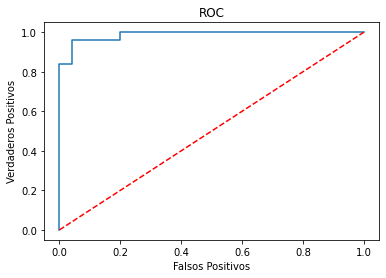

In [25]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

La Regresión Logística es un modelo linear, esto es, un modelo que crea una decisión que es lineal en el espacio de entrada. En nuestro dataset, esto significa que el umbral de decisión es una recta que separa las dos variables de entrada:

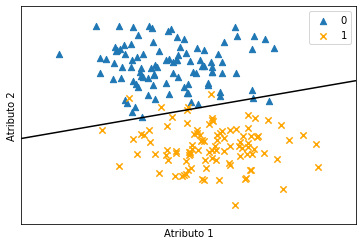

In [26]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="1", c="orange", marker="x")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend(loc="best")
figures.plot_2d_separator(clf, X)

plt.show()

In [27]:
import statsmodels.discrete.discrete_model as sm

In [28]:
model = sm.Logit(y_train, X_train)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.133104
         Iterations 9


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Dec 2020   Pseudo R-squ.:                  0.8080
Time:                        17:07:39   Log-Likelihood:                -19.966
converged:                       True   LL-Null:                       -103.97
Covariance Type:            nonrobust   LLR p-value:                 2.010e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8377      0.579      4.904      0.000       1.704       3.972
x2            -2.0150      0.390     -5.168      0.000      -2.779      -1.251
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""